In [1]:
# ライブラリーのインポート
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 必要な関数を読み込む
from hmmlearn import hmm

In [2]:
df = np.loadtxt("../data/qtdbsel102.txt", delimiter="\t")

In [3]:
# 3列目のデータを使用
# trainデータ, testデータを作成
train_df = df[0:3000, 2]
test_df = df[3000:6000, 2]

Text(0.5, 0, 'time')

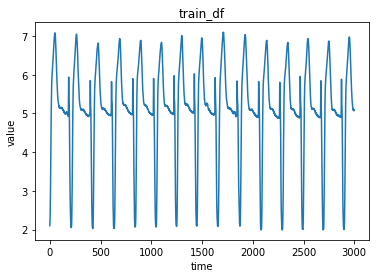

In [4]:
# 学習データの可視化
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(False)

ax.plot(train_df)

ax.set_title('train_df')
ax.set_ylabel('value')
ax.set_xlabel('time')

Text(0.5, 0, 'time')

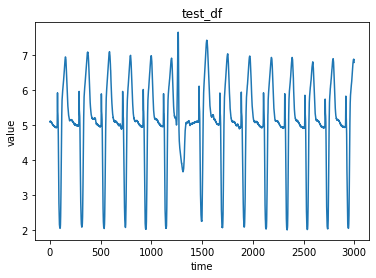

In [5]:
# 評価データの可視化
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(False)

ax.plot(test_df)

ax.set_title('test_df')
ax.set_ylabel('value')
ax.set_xlabel('time')

In [6]:
num_states = 15

X = train_df.reshape(-1, 1)
lengths = [len(train_df)]

np.random.seed(seed=7)
model = hmm.GaussianHMM(n_components=num_states, covariance_type='full')
model.fit(X, lengths)

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=15, n_iter=10, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [7]:
# model.scores()関数では、系列x'の対数尤度p(log(x'))が計算される。
logprob = np.array([model.score(train_df[0:i+1].reshape(-1, 1)) for i in range(len(train_df))])
train_abnormality = -np.append(logprob[0], np.diff(logprob))

In [8]:
# 閾値の設定
ratio = 0.005 # 異常と判断する割合
threshold = np.sort(train_abnormality)[int((1-ratio)*len(train_abnormality))]
print(threshold)

3.1943835234922062


In [9]:
# 評価データの異常検知
logprob = np.array([model.score(test_df[0:i+1].reshape(-1, 1)) for i in range(len(test_df))])
test_abnormality = -np.append(logprob[0], np.diff(logprob))

Text(0, 0.5, 'test_df_abnormality')

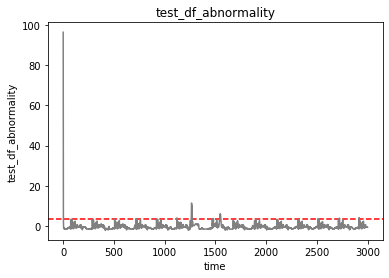

In [10]:
# 評価データの異常度を可視化
# 管理限界を破線で示す
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.grid(False)

ax.axhline(threshold, ls="--", color="red")
ax.plot(test_abnormality, color="gray")

ax.set_title('test_df_abnormality')
ax.set_xlabel('time')
ax.set_ylabel('test_df_abnormality')

Text(0, 0.5, 'abnormality')

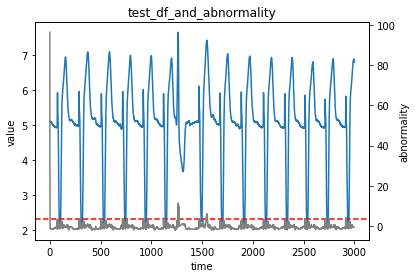

In [11]:
# 評価データの異常度を可視化
# 管理限界を破線で示す
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.grid(False)

# ax1とax2を関連させる
ax2 = ax1.twinx()

ax2.axhline(threshold, ls="--", color="red")
ax1.plot(test_df)
ax2.plot(test_abnormality, color="gray")

ax1.set_title('test_df_and_abnormality')
ax1.set_ylabel('value')
ax1.set_xlabel('time')
ax2.set_ylabel('abnormality')